The Dataset is taken from the following Kaggle source:

[2]	“Fake news,” Kaggle. Available: https://www.kaggle.com/competitions/fakenews/data?select=submit.csv. 

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr 29 17:57:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns


from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error

#import natural language specific libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

from string import punctuation
import re,string,unicodedata


import nltk
nltk.download('punkt')

#for reproducibility
import random
random.seed(10)
print(random.random())



import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
0.5714025946899135


In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!unzip '/content/drive/MyDrive/DS PROJECT/fake-news (2).zip'

Archive:  /content/drive/MyDrive/DS PROJECT/fake-news (2).zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [5]:
#load dataset 
train= '/content/train.csv'
test= '/content/test.csv'
test_target='/content/submit.csv'
train=pd.read_csv(train)
test=pd.read_csv(test)
test_target=pd.read_csv(test_target)

In [6]:
test=pd.merge(test,test_target)
test.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [7]:
df=pd.concat([train,test])

In [8]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
df.shape
df.info()
df.isnull().any()
data=df.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      26000 non-null  int64 
 1   title   25320 non-null  object
 2   author  23540 non-null  object
 3   text    25954 non-null  object
 4   label   26000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


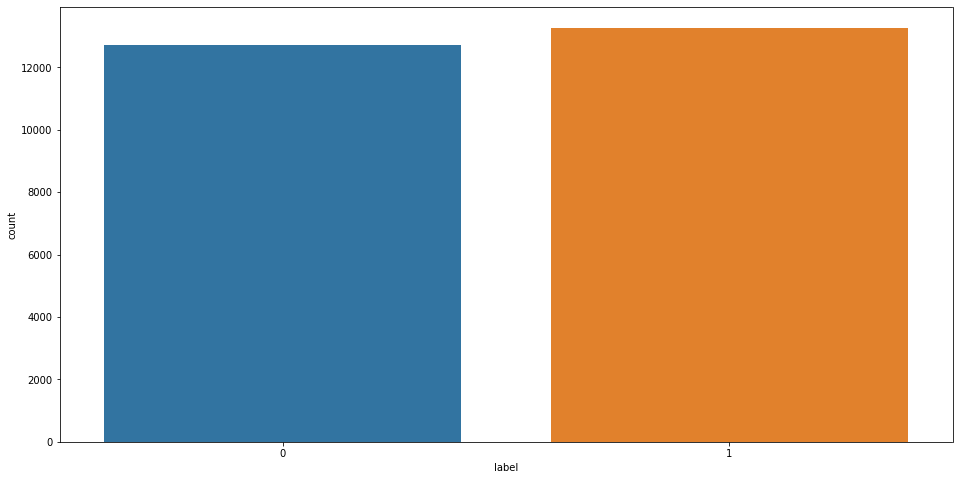

In [10]:
plt.figure(figsize=(16,8))
sns.countplot(df.label)

In [11]:
from sklearn.utils import shuffle
data_shuffled=shuffle(data)

data_shuffled

,id,title,author,text,label
4975,25775,The Calculus in Six Crucial Senate Races - The...,Jennifer Steinhauer,A look at the political math in six states whe...,1
17176,17176,McCain: ‘I Don’t Know’ If Trump-Russia Dossier...,Pam Key,Wednesday on CNN addressing media reports that...,0
742,742,"Hey Ho, It’s Old: England Embraces Punk Rock 4...",Christopher D. Shea,"BLACKPOOL, England — “Ramones forever!” C. ...",0
1281,1281,The Ancient Spiritual Roots Of Russophobia,The Saker,"280 Views November 06, 2016 No Comments Analys...",1
13688,13688,Uber Partners With Daimler in a Step Toward a ...,Mike Isaac,SAN FRANCISCO — Uber is one step closer to ...,0
...,...,...,...,...,...
2465,2465,Centrum – The World's Most Popular Multivitami...,Dikran Arakelian (noreply@blogger.com),"Share on Facebook This can result in fatigue, ...",1
9424,9424,AMTV Hiring a Interview Coordinator,Truth Broadcast Network,reports on What You Need to Know About the '...,1
2722,23522,Sad Hillary Clinton Finally Concedes To Trump ...,Starkman,Hillary Clinton publicly conceded the U.S. pre...,1
15698,15698,Republicans Threatening To Create Havoc At Pol...,Wes Williams,Google Pinterest Digg Linkedin Reddit Stumbleu...,1


In [12]:
#preprocess

import nltk
import re
import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))


from nltk.tokenize import word_tokenize

punctuations = list(string.punctuation)
lemma = WordNetLemmatizer() 

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [13]:
#dropdate
#subject,text,title%
data_shuffled ['total']= data_shuffled['text']+''+data_shuffled['title']

In [14]:
#import natural language specific libraries


def clean_text(text):
    text=re.sub("[^a-zA-Z]"," ",text) 
    text=re.sub('<.*?>', ' ', text)  
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    text=text.lower() 
    tokens=word_tokenize(text) 
    tokens=[token for token in tokens if token not in stop_words and token not in punctuations] 
    tokens=[lemma.lemmatize(token) for token in tokens] 
    text=" ".join(tokens)
    return text



In [15]:
data_shuffled['total'] = data_shuffled['total'].apply(lambda x : clean_text(x))


In [16]:
data_shuffled['total']

4975     look political math six state tight race could...
17176    wednesday cnn addressing medium report turned ...
742      blackpool england ramones forever c j ramone y...
1281     view november comment analysis saker article w...
13688    san francisco uber one step closer dream futur...
                               ...                        
2465     share facebook result fatigue dizziness shortn...
9424     report need know alt right get new amtv coffee...
2722     hillary clinton publicly conceded u presidenti...
15698    google pinterest digg linkedin reddit stumbleu...
20738    trying time jackie mason voice reason week exc...
Name: total, Length: 22860, dtype: object

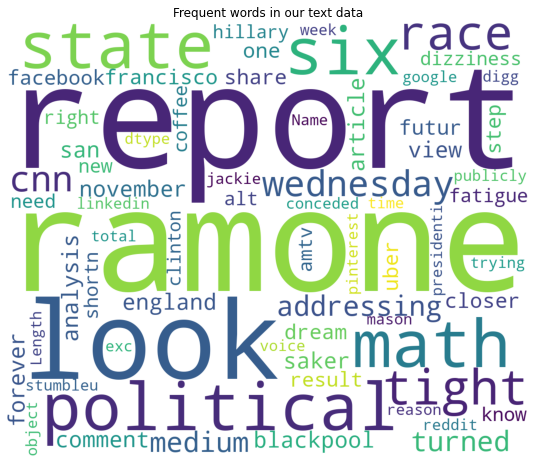

In [17]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(str(data_shuffled['total']))

plt.figure( figsize=(16,8) )
plt.imshow(wordcloud)
plt.title('Frequent words in our text data')
plt.axis('off')
plt.show()

In [18]:
X = data_shuffled['total'][:25000]
y = data_shuffled['label'][:25000]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 50000 , lowercase=False , ngram_range=(1,2))

vec_train = vectorizer.fit_transform(X_train)
vec_train = vec_train.toarray()
vec_test = vectorizer.transform(X_test).toarray()

In [21]:
train_data = pd.DataFrame(vec_train , columns=vectorizer.get_feature_names_out())
test_data = pd.DataFrame(vec_test , columns= vectorizer.get_feature_names_out())

In [22]:
train_data

,aa,aa superluminal,aaa,aap,aaron,aaron klein,aaron rodgers,aaronkleinshow,aaronkleinshow follow,aarp,...,zu,zubaydah,zucker,zuckerberg,zuesse,zum,zuma,zur,zurich,zwei
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(train_data,y_train)
y_pred=model.predict(test_data)

In [24]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)

print('the model performance')
print('----------------------')
print('MSE is {}'.format(mse))
print('R-squared score is {}'.format(r))

the model performance
----------------------
MSE is 0.1673228346456693
R-squared score is 0.3241614624908047


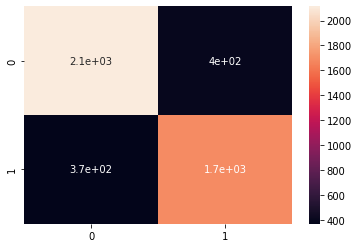

In [25]:
#evaluate performance
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf=confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)

In [26]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, y_pred)
accuracy

0.8326771653543307

In [27]:
#precision score
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred)
precision

0.8100478468899521

In [28]:
#recall score
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
recall

0.8214459000485201

In [29]:
#f1 score
from sklearn.metrics import f1_score
f1= f1_score(y_test,y_pred)
f1

0.8157070585401108

[Text(0.814380407880235, 0.9967741935483871, 'X[49871] <= 0.001\ngini = 0.495\nsamples = 18288\nvalue = [10063, 8225]'),
 Text(0.681107774732852, 0.9903225806451613, 'X[5018] <= 0.005\ngini = 0.44\nsamples = 11306\nvalue = [3695, 7611]'),
 Text(0.6165178078667379, 0.9838709677419355, 'X[33408] <= 0.016\ngini = 0.263\nsamples = 8324\nvalue = [1298, 7026]'),
 Text(0.5604502645074938, 0.9774193548387097, 'X[19709] <= 0.004\ngini = 0.236\nsamples = 8062\nvalue = [1101, 6961]'),
 Text(0.4728300255013868, 0.9709677419354839, 'X[37392] <= 0.001\ngini = 0.226\nsamples = 7972\nvalue = [1033, 6939]'),
 Text(0.34338883961649974, 0.964516129032258, 'X[1293] <= 0.005\ngini = 0.146\nsamples = 4539\nvalue = [361, 4178]'),
 Text(0.300226814979265, 0.9580645161290322, 'X[2304] <= 0.093\ngini = 0.086\nsamples = 3071\nvalue = [138, 2933]'),
 Text(0.28765509820368473, 0.9516129032258065, 'X[47693] <= 0.003\ngini = 0.079\nsamples = 3056\nvalue = [126, 2930]'),
 Text(0.2750833814281045, 0.9451612903225807, 

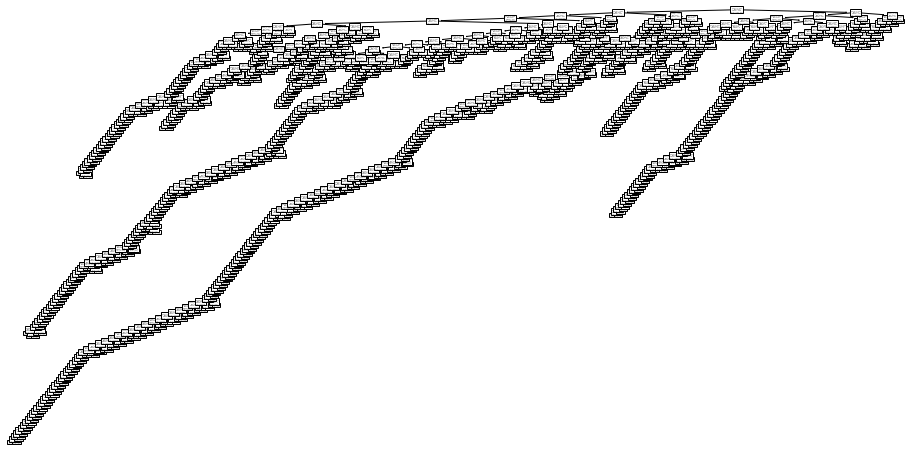

In [31]:
plt.figure( figsize=(16,8) )
from sklearn import tree
tree.plot_tree(model)

LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_data,y_train)
y_pred=model.predict(test_data)

In [24]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)

print('the model performance')
print('----------------------')
print('MSE is {}'.format(mse))
print('R-squared score is {}'.format(r))

the model performance
----------------------
MSE is 0.12226596675415573
R-squared score is 0.5065304278316478


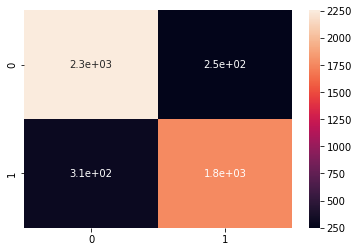

In [25]:
#evaluate performance
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf=confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)

In [26]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, y_pred)
accuracy

0.8777340332458443

In [27]:
#precision score
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred)
precision

0.8756837394331178

In [28]:
#recall score
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
recall

0.8507246376811595

In [29]:
#f1 score
from sklearn.metrics import f1_score
f1= f1_score(y_test,y_pred)
f1

0.8630237686841461

NAIVE BAYES

In [30]:
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()

model.fit(train_data,y_train)
y_pred=model.predict(test_data)

In [31]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)

print('the model performance')
print('----------------------')
print('MSE is {}'.format(mse))
print('R-squared score is {}'.format(r))

the model performance
----------------------
MSE is 0.18175853018372704
R-squared score is 0.26641643207173393


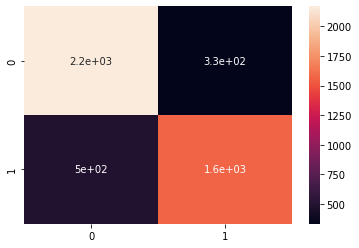

In [32]:
#evaluate performance
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf=confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)

In [33]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, y_pred)
accuracy

0.818241469816273

In [34]:
#precision score
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred)
precision

0.8248557944415312

In [35]:
#recall score
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
recall

0.759903381642512

In [36]:
#f1 score
from sklearn.metrics import f1_score
f1= f1_score(y_test,y_pred)
f1

0.7910485290419914

RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()
model.fit(train_data,y_train)
y_pred=model.predict(test_data)

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)

print('the model performance')
print('----------------------')
print('MSE is {}'.format(mse))
print('R-squared score is {}'.format(r))

the model performance
----------------------
MSE is 0.1268591426071741
R-squared score is 0.48799221492371325


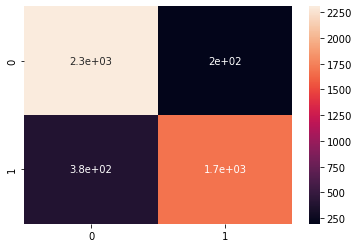

In [39]:
#evaluate performance
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf=confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)

In [40]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, y_pred)
accuracy

0.8731408573928259

In [41]:
#precision score
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred)
precision

0.8962765957446809

In [42]:
#recall score
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
recall

0.8140096618357487

In [43]:
#f1 score
from sklearn.metrics import f1_score
f1= f1_score(y_test,y_pred)
f1

0.8531645569620253

BERT

The following code is used as reference for this model implementation.

citation:

[20]	Saumyab271, “Text classification using Bert and tensorflow,” Analytics Vidhya, 31-Dec-2021. Available: https://www.analyticsvidhya.com/blog/2021/12/text-classification-using-bert-and-tensorflow/. 

In [32]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow_text
import tensorflow_text as text

     |████████████████████████████████| 4.9 MB 4.9 MB/s 
     |████████████████████████████████| 462 kB 85.5 MB/s 


In [33]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [34]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [47]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m ])
history=model.fit(X_train, y_train, epochs=30, batch_size = 32, validation_data=(X_train,y_train))

Epoch 1/30
572/572 [==============================] - 294s 488ms/step - loss: 0.6390 - accuracy: 0.6282 - f1_m: 0.4988 - precision_m: 0.6365 - recall_m: 0.4484 - val_loss: 0.6027 - val_accuracy: 0.6691 - val_f1_m: 0.5547 - val_precision_m: 0.6906 - val_recall_m: 0.4772
Epoch 2/30
572/572 [==============================] - 276s 483ms/step - loss: 0.6020 - accuracy: 0.6711 - f1_m: 0.5696 - precision_m: 0.6847 - recall_m: 0.5154 - val_loss: 0.5981 - val_accuracy: 0.6672 - val_f1_m: 0.4683 - val_precision_m: 0.8004 - val_recall_m: 0.3430
Epoch 3/30
572/572 [==============================] - 275s 482ms/step - loss: 0.5874 - accuracy: 0.6894 - f1_m: 0.5987 - precision_m: 0.7075 - recall_m: 0.5482 - val_loss: 0.5690 - val_accuracy: 0.7093 - val_f1_m: 0.6473 - val_precision_m: 0.6997 - val_recall_m: 0.6157
Epoch 4/30
572/572 [==============================] - 274s 480ms/step - loss: 0.5770 - accuracy: 0.6978 - f1_m: 0.6158 - precision_m: 0.7096 - recall_m: 0.5730 - val_loss: 0.5606 - val_accur

In [49]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
print(y_predicted)

[0.36134133 0.6107778  0.5720645  ... 0.18393254 0.11267969 0.28542793]


In [50]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)

143/143 [==============================] - 35s 244ms/step - loss: 0.5302 - accuracy: 0.7362 - f1_m: 0.6602 - precision_m: 0.7853 - recall_m: 0.5863


In [51]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,f1_m,precision_m,recall_m,val_loss,val_accuracy,val_f1_m,val_precision_m,val_recall_m,epoch
25,0.537560,0.729276,0.667427,0.733282,0.634350,0.514536,0.750875,0.699625,0.746854,0.671271,25
26,0.539621,0.726433,0.667535,0.726972,0.638963,0.516115,0.747485,0.702564,0.732041,0.688180,26
27,0.534242,0.730206,0.669960,0.730864,0.639280,0.515807,0.744915,0.668689,0.779559,0.598286,27
28,0.540250,0.732885,0.672994,0.737064,0.641617,0.519577,0.737588,0.649830,0.786739,0.566890,28
29,0.537910,0.728073,0.668743,0.727693,0.640554,0.514809,0.748524,0.670725,0.791154,0.594715,29


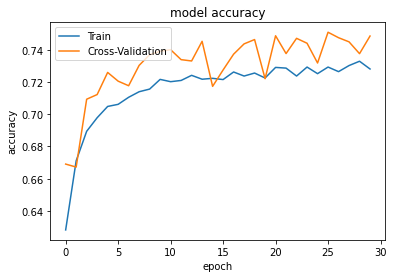

In [52]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

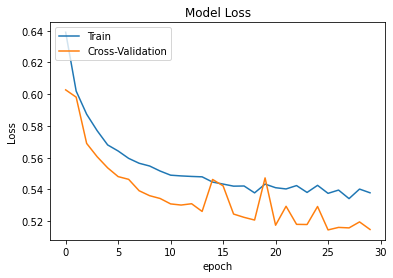

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [54]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [55]:
print('the model performance')
print('------------------------------')
print('MSE is {}'.format(mse))
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))

the model performance
------------------------------
MSE is 0.1775887212034968
MAE is 0.3632668846780605
RMSE is 0.42141276820179147


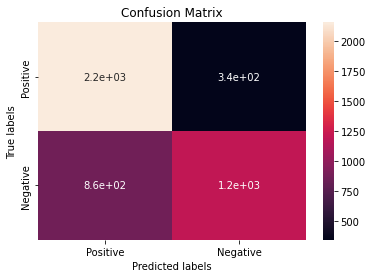

In [56]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(X_test)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(y_test, predict_results)

sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

MLP

In [57]:
train_data,y_train=np.asarray(train_data),np.asarray(y_train)
test_data,y_test=np.asarray(test_data),np.asarray(y_test)

In [58]:
print(train_data.shape) 
print(test_data.shape) 
print(y_train.shape) 
print(y_test.shape) 

(18288, 50000)
(4572, 50000)
(18288,)
(4572,)


In [59]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import binary_crossentropy

In [60]:
max_words=50000
EPOCHS = 5
batch_size = 16 

In [61]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [62]:
model = Sequential()
   
model.add(Dense(50,input_shape=(max_words,),activation='relu'))
model.add(Dropout(0.2))
    
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
    
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.4))
    
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(1,activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',f1_m,precision_m, recall_m])
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2500050   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               15150     
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               3

In [63]:
history = model.fit(train_data, y_train,epochs=30,validation_data = (train_data, y_train))


Epoch 1/30
572/572 [==============================] - 11s 18ms/step - loss: 0.3662 - accuracy: 0.8510 - f1_m: 0.7867 - precision_m: 0.8150 - recall_m: 0.7732 - val_loss: 0.1780 - val_accuracy: 0.9431 - val_f1_m: 0.9339 - val_precision_m: 0.9461 - val_recall_m: 0.9261
Epoch 2/30
572/572 [==============================] - 6s 10ms/step - loss: 0.1705 - accuracy: 0.9388 - f1_m: 0.9280 - precision_m: 0.9359 - recall_m: 0.9250 - val_loss: 0.0671 - val_accuracy: 0.9772 - val_f1_m: 0.9742 - val_precision_m: 0.9737 - val_recall_m: 0.9765
Epoch 3/30
572/572 [==============================] - 6s 10ms/step - loss: 0.0726 - accuracy: 0.9754 - f1_m: 0.9713 - precision_m: 0.9683 - recall_m: 0.9765 - val_loss: 0.0320 - val_accuracy: 0.9879 - val_f1_m: 0.9862 - val_precision_m: 0.9768 - val_recall_m: 0.9968
Epoch 4/30
572/572 [==============================] - 6s 10ms/step - loss: 0.0415 - accuracy: 0.9850 - f1_m: 0.9825 - precision_m: 0.9786 - recall_m: 0.9876 - val_loss: 0.0200 - val_accuracy: 0.9914

In [64]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,f1_m,precision_m,recall_m,val_loss,val_accuracy,val_f1_m,val_precision_m,val_recall_m,epoch
25,0.014050,0.993876,0.992952,0.989292,0.997129,0.009679,0.994915,0.994164,0.990921,0.997834,25
26,0.014321,0.993384,0.992192,0.988867,0.996148,0.010138,0.994915,0.994143,0.989195,0.999543,26
27,0.011898,0.993766,0.992966,0.988410,0.998146,0.010359,0.994751,0.994017,0.990061,0.998406,27
28,0.012155,0.993493,0.992535,0.989538,0.996081,0.009549,0.994915,0.994321,0.991468,0.997576,28
29,0.013709,0.994094,0.993088,0.990285,0.996420,0.009246,0.994477,0.993601,0.988221,0.999511,29


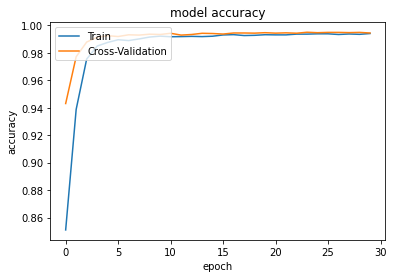

In [65]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

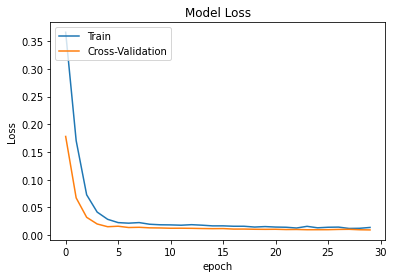

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [67]:
y_pred=model.predict(test_data)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [68]:
print('the model performance')
print('------------------------------')
print('MSE is {}'.format(mse))
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))

the model performance
------------------------------
MSE is 0.14428237388926474
MAE is 0.1536960796810604
RMSE is 0.3798451972702363


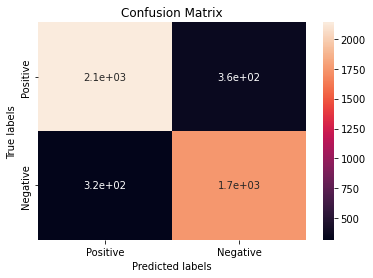

In [69]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(test_data)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(y_test, predict_results)

sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);